In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# set neat seaborn whitegrid styles for matplotlib charts
plt.style.use('seaborn')
sns.set_style('whitegrid')

In [3]:
# load csv data into dask df
file_name = '../data/Crimes_-_2017.csv'
crimes = dd.read_csv(file_name, 
                 error_bad_lines=False,
                 assume_missing=True)

In [4]:
%%time
# log records count and data partitions
print('{:,} total records in {} partitions'\
      .format(len(crimes), crimes.npartitions))

172,327 total records in 1 partitions
Wall time: 1.2 s


In [5]:
%%time
# drop duplicates
crimes.drop_duplicates(subset=['ID', 'Case Number'], inplace=True)

Wall time: 10.7 ms


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
npartitions=1,,,,,,,,,,,,,,,,,,,,,,
None,float64,object,object,object,object,object,object,object,bool,bool,float64,float64,float64,float64,object,float64,float64,float64,object,float64,float64,object
None,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [6]:
%%time
# persist in memory
crimes = crimes.persist()

Wall time: 1.25 s


In [7]:
%%time
print("DataFrame size: {:,}".format(crimes.size.compute()))

DataFrame size: 3,791,194
Wall time: 7.81 ms


In [8]:
# get top 2 records
crimes.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11074039.0,JA414415,07/19/2017 09:30:00 AM,078XX S JEFFERY BLVD,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,...,8.0,43.0,11,NaN,NaN,2017.0,09/01/2017 03:54:24 PM,NaN,NaN,NaN
1,11074038.0,JA414425,08/24/2017 08:30:00 PM,082XX S COLES AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,7.0,46.0,06,NaN,NaN,2017.0,09/01/2017 03:54:24 PM,NaN,NaN,NaN


In [9]:
# get last 2 records
crimes.tail(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
172325,10802618.0,JA100607,01/01/2017 01:00:00 PM,003XX S HOYNE AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,2.0,28.0,06,NaN,NaN,2017.0,01/08/2017 03:48:20 PM,NaN,NaN,NaN
172326,10802303.0,JA101463,01/01/2017 07:00:00 PM,011XX E BOWEN AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,4.0,36.0,07,NaN,NaN,2017.0,01/08/2017 03:48:20 PM,NaN,NaN,NaN


In [10]:
# strip out white space from column names
crimes = crimes.rename(columns={c: c.replace(' ', '') for c in crimes.columns})
crimes.head(2)

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,Domestic,...,Ward,CommunityArea,FBICode,XCoordinate,YCoordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,11074039.0,JA414415,07/19/2017 09:30:00 AM,078XX S JEFFERY BLVD,1130,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,...,8.0,43.0,11,NaN,NaN,2017.0,09/01/2017 03:54:24 PM,NaN,NaN,NaN
1,11074038.0,JA414425,08/24/2017 08:30:00 PM,082XX S COLES AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,...,7.0,46.0,06,NaN,NaN,2017.0,09/01/2017 03:54:24 PM,NaN,NaN,NaN


In [11]:
# list columns
crimes.columns

Index(['ID', 'CaseNumber', 'Date', 'Block', 'IUCR', 'PrimaryType',
       'Description', 'LocationDescription', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'CommunityArea', 'FBICode', 'XCoordinate',
       'YCoordinate', 'Year', 'UpdatedOn', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [12]:
# infer data types
crimes.dtypes

ID                     float64
CaseNumber              object
Date                    object
Block                   object
IUCR                    object
PrimaryType             object
Description             object
LocationDescription     object
Arrest                    bool
Domestic                  bool
Beat                   float64
District               float64
Ward                   float64
CommunityArea          float64
FBICode                 object
XCoordinate            float64
YCoordinate            float64
Year                   float64
UpdatedOn               object
Latitude               float64
Longitude              float64
Location                object
dtype: object

In [13]:
def unique_column_values(df):
    for column in df.columns:
        print("{} | {} | {}".format(
            df[column].name,
            len(df[column].unique()),
            df[column].dtype))

In [14]:
%%time
# print unique column values counts
print("Name | Unique # | Type")
unique_column_values(crimes)

Name | Unique # | Type
ID | 172327 | float64
CaseNumber | 172294 | object
Date | 75491 | object
Block | 25385 | object
IUCR | 318 | object
PrimaryType | 32 | object
Description | 297 | object
LocationDescription | 124 | object
Arrest | 2 | bool
Domestic | 2 | bool
Beat | 274 | float64
District | 23 | float64
Ward | 51 | float64
CommunityArea | 78 | float64
FBICode | 26 | object
XCoordinate | 44477 | float64
YCoordinate | 59243 | float64
Year | 1 | float64
UpdatedOn | 441 | object
Latitude | 92660 | float64
Longitude | 92652 | float64
Location | 92671 | object
Wall time: 1.78 s


In [15]:
# reduce data set
select_columns = ['Date', 'Block', 'PrimaryType','Description', 'LocationDescription', 
                  'Arrest', 'Domestic', 'Latitude', 'Longitude']

In [16]:
crimes = crimes[select_columns]
print("{:,} total records".format(len(crimes)))
crimes.head(2)

172,327 total records


,Date,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
0,07/19/2017 09:30:00 AM,078XX S JEFFERY BLVD,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,NaN,NaN
1,08/24/2017 08:30:00 PM,082XX S COLES AVE,THEFT,$500 AND UNDER,STREET,False,False,NaN,NaN


In [17]:
# drop duplicates
crimes = crimes.drop_duplicates() #.dropna()
print("{:,} total records".format(len(crimes)))
crimes.head(2)

172,030 total records


,Date,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
0,07/19/2017 09:30:00 AM,078XX S JEFFERY BLVD,DECEPTIVE PRACTICE,FRAUD OR CONFIDENCE GAME,APARTMENT,False,False,NaN,NaN
1,08/24/2017 08:30:00 PM,082XX S COLES AVE,THEFT,$500 AND UNDER,STREET,False,False,NaN,NaN


In [18]:
# count arrests
arrests = crimes[crimes.Arrest==True]
print("{:,} arrests".format(len(arrests)))
arrests.head()

33,084 arrests


,Date,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
41,02/18/2017 09:00:00 AM,001XX S RIVERSIDE PLZ,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,False,NaN,NaN
81,08/18/2017 07:36:00 AM,027XX N LEAVITT ST,ASSAULT,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,True,False,NaN,NaN
270,08/25/2017 10:40:00 PM,005XX N LECLAIRE AVE,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,41.889848,-87.752967
272,08/25/2017 11:20:00 PM,038XX W MONROE ST,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,RESIDENTIAL YARD (FRONT/BACK),True,False,41.879808,-87.722018
274,08/25/2017 11:17:00 PM,016XX S KEDZIE AVE,NARCOTICS,POSS: HEROIN(WHITE),OTHER,True,False,41.858799,-87.705449


In [19]:
# domestic violance
domestic = crimes[crimes.Domestic==True]
print("{:,} domestic crime reports".format(len(domestic)))
domestic.head()

28,092 domestic crime reports


,Date,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
10,04/19/2017 08:00:00 PM,020XX W 69TH PL,THEFT,OVER $500,RESIDENCE,False,True,NaN,NaN
21,08/24/2017 07:05:00 PM,131XX S ST LAWRENCE AVE,OTHER OFFENSE,OTHER VEHICLE OFFENSE,CHA APARTMENT,False,True,NaN,NaN
32,08/20/2017 07:00:00 PM,049XX S DR MARTIN LUTHER KING JR DR,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,True,NaN,NaN
43,08/09/2017 04:00:00 PM,012XX S HOMAN AVE,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,NaN,NaN
64,04/01/2017 02:00:00 PM,070XX S RACINE AVE,OFFENSE INVOLVING CHILDREN,CHILD ABDUCTION,RESIDENCE,False,True,NaN,NaN


In [20]:
crimes.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 9 entries, Date to Longitude
dtypes: object(5), bool(2), float64(2)

In [21]:
# get narcotics crimes
narcotics = crimes[crimes['PrimaryType']=='NARCOTICS']
narcotics = narcotics.set_index('Date')
narcotics.head()

,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,
01/01/2017 01:31:00 PM,077XX S UNION AVE,NARCOTICS,MANU/DELIVER:CRACK,RESIDENCE,True,False,41.753552,-87.641674
01/01/2017 01:58:00 PM,050XX W CHICAGO AVE,NARCOTICS,MANU/DELIVER: HALLUCINOGEN,TAVERN/LIQUOR STORE,True,False,NaN,NaN
01/01/2017 02:12:00 PM,083XX S COTTAGE GROVE AVE,NARCOTICS,POSS: CRACK,GAS STATION,True,False,41.743504,-87.605018
01/01/2017 02:24:00 PM,010XX N RIDGEWAY AVE,NARCOTICS,POSS: HEROIN(WHITE),SIDEWALK,True,False,41.900070,-87.720124
01/01/2017 03:19:00 AM,055XX W WASHINGTON BLVD,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,41.882252,-87.764442


In [22]:
# get narcotics crime description counts
narcotics_crimes = narcotics[['PrimaryType', 'Description']]\
.groupby('Description').count().compute()\
.sort_values(by='PrimaryType', ascending=False)

print(narcotics_crimes.head(10))
print('...')
print('Total Narcotics Crime Descriptions: {}'.format(len(narcotics_crimes)))

                                PrimaryType
Description                                
POSS: HEROIN(WHITE)                    1400
POSS: CANNABIS 30GMS OR LESS            811
POSS: CRACK                             683
MANU/DELIVER: HEROIN (WHITE)            676
FOUND SUSPECT NARCOTICS                 519
MANU/DEL:CANNABIS 10GM OR LESS          425
POSS: CANNABIS MORE THAN 30GMS          399
MANU/DEL:CANNABIS OVER 10 GMS           385
POSS: COCAINE                           322
MANU/DELIVER:CRACK                      277
...
Total Narcotics Crime Descriptions: 40


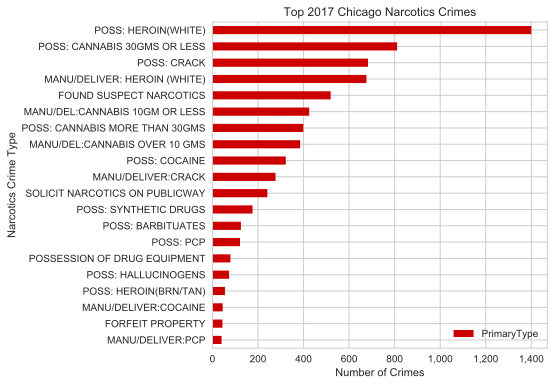

In [23]:
# plot top 20 narcotics crimes
narcotics_crimes[:20].sort_values(by='PrimaryType', ascending=True)\
.plot(kind='barh', figsize=(6,6), color='#cc0000')
plt.title('Top 2017 Chicago Narcotics Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Narcotics Crime Type')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

In [24]:
# get other offenses crimes
other_offenses = crimes[crimes['PrimaryType']=='OTHER OFFENSE']
other_offenses = other_offenses.set_index('Date')
other_offenses.head()

,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic,Latitude,Longitude
Date,,,,,,,,
01/01/2017 01:00:00 AM,056XX S MAYFIELD AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,NaN,NaN
01/01/2017 01:00:00 AM,019XX N HAMLIN AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,41.916211,-87.721638
01/01/2017 01:00:00 PM,023XX W 115TH ST,OTHER OFFENSE,OTHER VEHICLE OFFENSE,STREET,False,False,41.684460,-87.679939
01/01/2017 01:00:00 PM,021XX W ARMITAGE AVE,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,OTHER,False,True,41.917689,-87.680898
01/01/2017 01:10:00 AM,075XX S DAMEN AVE,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,41.757026,-87.673325


In [25]:
# get other offense crime description counts
other_offense_crimes = other_offenses[['PrimaryType', 'Description']]\
.groupby('Description').count().compute()\
.sort_values(by='PrimaryType', ascending=False)

print(other_offense_crimes.head(10))
print('...')
print('Total Other Offense Crime Descriptions: {}'.format(len(other_offense_crimes)))

                                PrimaryType
Description                                
TELEPHONE THREAT                       2625
HARASSMENT BY TELEPHONE                1861
HARASSMENT BY ELECTRONIC MEANS         1761
VIOLATE ORDER OF PROTECTION            1053
OTHER VEHICLE OFFENSE                   960
PAROLE VIOLATION                        599
FALSE/STOLEN/ALTERED TRP                576
VEHICLE TITLE/REG OFFENSE               415
LICENSE VIOLATION                       323
OTHER CRIME AGAINST PERSON              259
...
Total Other Offense Crime Descriptions: 41


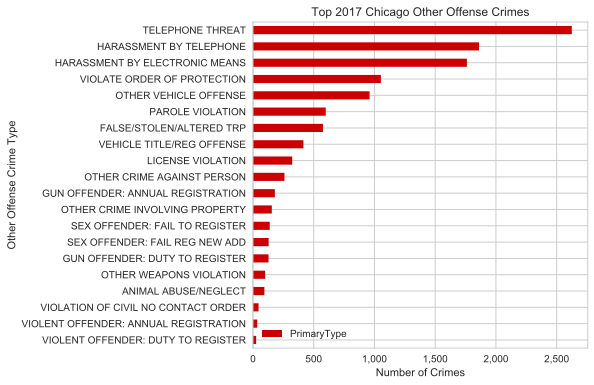

In [26]:
# plot top 20 other offense crimes
other_offense_crimes[:20].sort_values(by='PrimaryType', ascending=True)\
.plot(kind='barh', figsize=(6,6), color='#cc0000')
plt.title('Top 2017 Chicago Other Offense Crimes')
plt.xlabel('Number of Crimes')
plt.ylabel('Other Offense Crime Type')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()